<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Меры качества кластеризации, уменьшение размерности признаков (практика)</center></h2>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Качество алгоритмов кластеризации

#### Задание
Запустите метод k-средних для данных ниже, расчитайте меру качества ARI по отношению к истинному разбиению в переменной `y` и меру `silhouette`.

Все должно получится идеально (ну или почти)!

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score

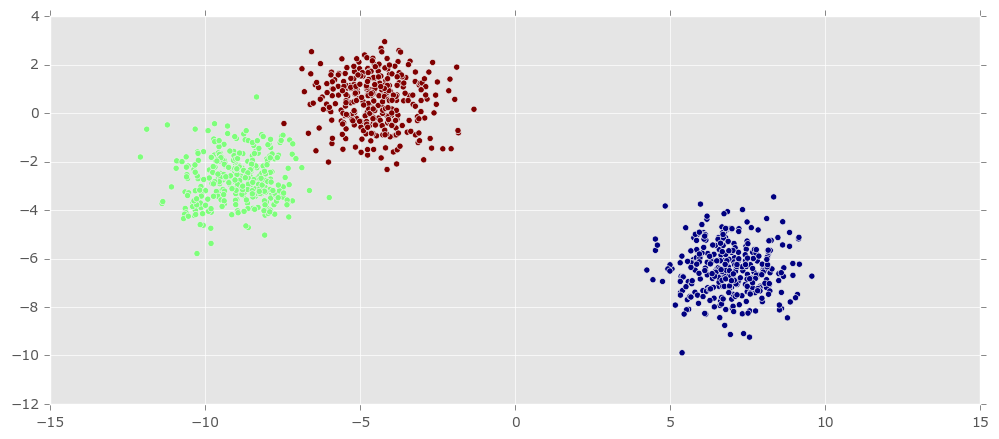

In [8]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

In [13]:
ari = adjusted_rand_score(y, labels)
print ari

0.994012054204


In [14]:
sil = silhouette_score(X, labels)
print sil

0.741493175455


In [18]:
sil_sample = silhouette_samples(X, labels)
idx = labels == 0

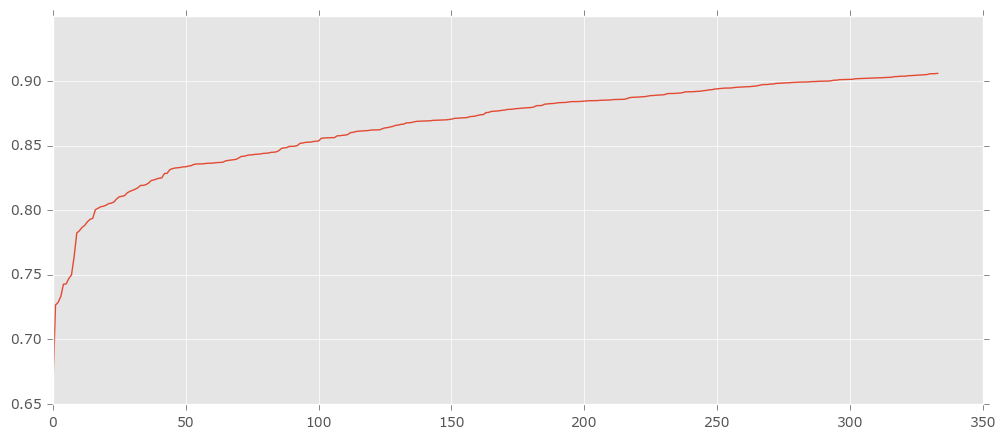

In [20]:
# Силуэт для кластера с меткой 0
plt.plot(np.sort(sil_sample[idx]))

#### Задание
Давайте чуть-чуть изменим данные.

Попробуем прокластеризовать их с помощью k-means и GMM (EM-алгоритма с гауссовскими распределениями).

Вновь оценим качество с помощью ARI и `silhouette`.

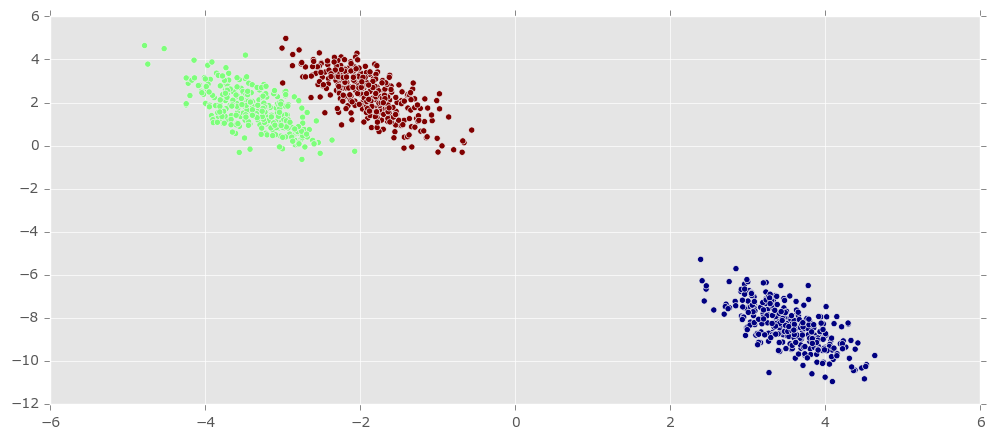

In [21]:
from sklearn.mixture import GMM
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_t)
labels = kmeans.labels_

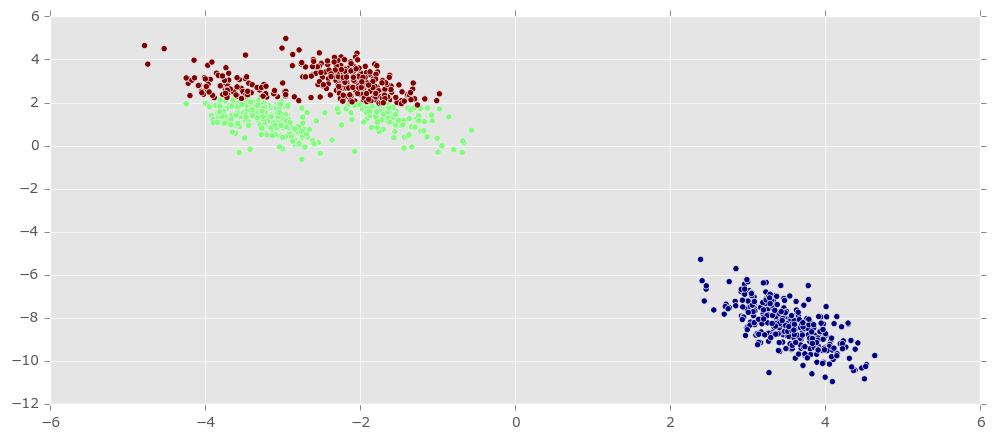

In [24]:
plt.scatter(X_t[:,0], X_t[:,1], c=labels)

In [25]:
ari = adjusted_rand_score(y, labels)
print ari

0.580963640151


In [28]:
pd.crosstab(y, labels)

col_0,0,1,2
row_0,,,
0,334,0,0
1,0,234,99
2,0,100,233


In [26]:
gmm = GMM()

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
from sklearn.mixture import GaussianMixture

In [31]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_t)
labels = gmm.predict(X_t)

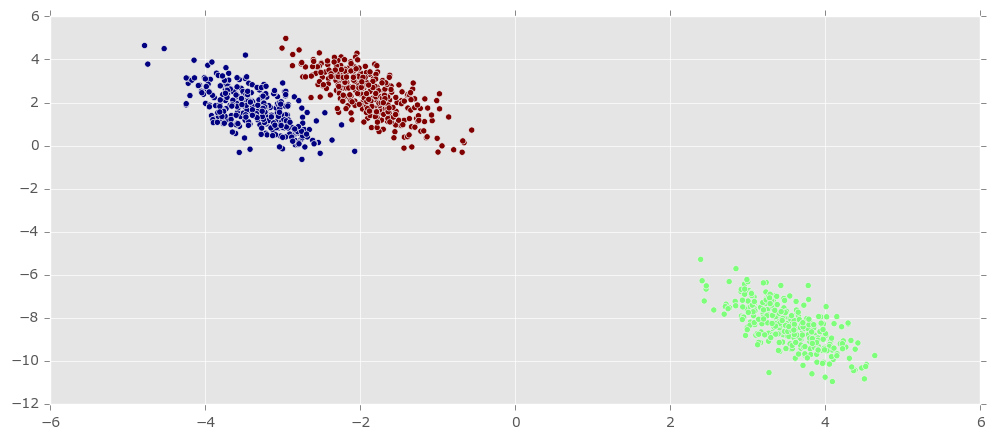

In [32]:
plt.scatter(X_t[:,0], X_t[:,1], c=labels)

In [33]:
gmm.covariances_

array([[[ 0.17581004, -0.24378763],
        [-0.24378763,  0.80126201]],

       [[ 0.17925135, -0.28507975],
        [-0.28507975,  0.9431988 ]],

       [[ 0.18448349, -0.30847238],
        [-0.30847238,  0.97880833]]])

In [34]:
gmm.means_

array([[-3.36497036,  1.69076652],
       [ 3.52848333, -8.35644743],
       [-1.89687175,  2.39976327]])

In [35]:
labels_proba = gmm.predict_proba(X_t)

In [36]:
labels_proba

array([[  9.99999907e-01,   3.11064790e-54,   9.32772433e-08],
       [  1.50947380e-62,   1.00000000e+00,   6.84546211e-39],
       [  9.99999995e-01,   4.52941581e-77,   4.84797926e-09],
       ..., 
       [  1.26383772e-63,   1.00000000e+00,   6.69450896e-39],
       [  1.52422839e-05,   8.68910490e-45,   9.99984758e-01],
       [  9.99999803e-01,   2.38133528e-59,   1.97059889e-07]])

In [37]:
labels_proba.shape

(1000, 3)

# Метод главных компонент

#### Задание

Загрузите стандартный датасет Iris.<br/>
Выполните PCA через SVD и помощью встроенной функции в sklearn, сравните результаты

In [39]:
from sklearn.datasets import load_iris
from numpy.linalg import svd
from sklearn.decomposition import PCA

In [41]:
iris = load_iris()
X = iris.data
y = iris.target

In [42]:
X.shape

(150, 4)

In [43]:
y.shape

(150,)

In [44]:
# Отнормируйте данные!
X = (X - X.mean(axis=0))/X.std(axis=0)

In [46]:
U, S, V_T = svd(X)

In [47]:
print U.shape
print S.shape
print V_T.shape

(150, 150)
(4,)
(4, 4)


In [52]:
PC = X.dot(V_T.T[:, :2])
PC[:10]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856],
       [-2.44571134, -0.07456268],
       [-2.23384186, -0.24761393],
       [-2.34195768,  1.09514636],
       [-2.18867576,  0.44862905]])

In [51]:
pca = PCA(n_components=2)
pca.fit(X)
PC_pca = pca.transform(X)
PC_pca[:10]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905]])

In [53]:
(S*S)/(S*S).sum()

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

In [54]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

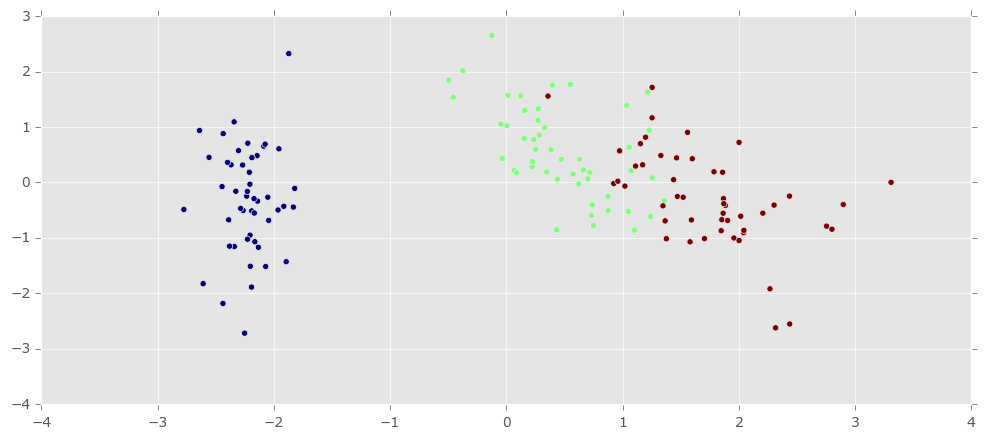

In [55]:
plt.scatter(PC[:,0], PC[:,1], c=y)

#### Задание
Посмотрите на данные бла-бла-бла

In [73]:
df = pd.read_csv('diet-forcsv - Sheet 1.csv')

In [74]:
df.head()

,Countries,Average latitude (º),Annual insolation (W.h/m2.day),Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),...,Life expectancy at birth (years) male,"Maternal mortality ratio (per 100 000 live births), 2005","Neonatal mortality rate (per 1 000 live births), 2004",Prevalence of tuberculosis (per 100 000 population),Under-5 mortality rate (probability of dying by age 5 per 1000 live births) both sexes,Under-5 mortality rate (probability of dying by age 5 per 1000 live births) female,Under-5 mortality rate (probability of dying by age 5 per 1000 live births) male,"Years of life lost to communicable diseases (%), 2002","Years of life lost to non-communicable diseases (%), 2002",countries
0,Albania,41.00,325.7,2860,96,86,425.50,813,49,62,...,67.5,92,9,32,21.0,19.5,22.0,17,63,Albania
1,Argentina,-34.00,352.9,2980,94,100,426.00,823,72,342,...,71.5,77,10,54,18.5,16.0,20.0,18,66,Argentina
2,Australia,-27.00,376.1,3120,107,134,371.50,1033,124,142,...,78.0,4,3,6,6.0,5.5,6.5,5,77,Australia
3,Austria,47.33,298.0,3740,111,162,459.50,1219,320,59,...,76.0,4,3,10,5.0,4.5,5.5,3,83,Austria
4,Bangladesh,24.00,384.7,2200,48,25,445.75,65,5,5,...,62.0,570,36,457,80.5,76.0,85.0,60,28,Bangladesh


In [75]:
df = df.set_index('Countries')
cols = ['Annual insolation (W.h/m2.day)', 'Energy (kcal/day)',
       'Protein (g/day)', 'Fats (g/day)', 'Carbohydrates (g/day)',
       'Animal Products + (kcal/day)', 'Animal Fats (kcal/day)',
       'Bovine Meat (kcal/day)', 'Butter, Ghee (kcal/day)',
       'Cheese (kcal/day)', 'Eggs (kcal/day)',
       'Fats, Animals, Raw (kcal/day)', 'Fish, Seafood (kcal/day)',
       'Freshwater Fish (kcal/day)', 'Honey (kcal/day)', 'Meat (kcal/day)',
       'Milk - Excluding Butter (kcal/day)', 'Milk, Whole (kcal/day)',
       'Mutton & Goat Meat (kcal/day)', 'Offals, Edible (kcal/day)',
       'Pelagic Fish (kcal/day)', 'Pigmeat (kcal/day)',
       'Poultry Meat (kcal/day)', 'Vegetal Products + (kcal/day)',
       'Alcoholic Beverages (kcal/day)', 'Apples (kcal/day)',
       'Bananas (kcal/day)', 'Beans (kcal/day)',
       'Cereals - Excluding Beer (kcal/day)', 'Coconut Oil (kcal/day)',
       'Coffee (kcal/day)', 'Fruits - Excluding Wine (kcal/day)',
       'Nuts (kcal/day)', 'Olive Oil (kcal/day)', 'Palm Oil (kcal/day)',
       'Potatoes (kcal/day)', 'Pulses (kcal/day)',
       'Rice (Milled Equivalent) (kcal/day)',
       'Rice (Paddy Equivalent) (kcal/day)',
       'Roots & Tuber Dry Equiv (kcal/day)', 'Soyabean Oil (kcal/day)',
       'Starchy Roots (kcal/day)', 'Sugar & Sweeteners (kcal/day)',
       'Sugar (Raw Equivalent) (kcal/day)',
       'Sugar, Raw Equivalent (kcal/day)',
       'Sugar, Refined Equiv (kcal/day)', 'Vegetable Oils (kcal/day)',
       'Vegetables (kcal/day)', 'Wheat (kcal/day)', 'Wine (kcal/day)']
df = df.loc[:,cols]

In [76]:
df.head()

,Annual insolation (W.h/m2.day),Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),...,Soyabean Oil (kcal/day),Starchy Roots (kcal/day),Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day)
Countries,,,,,,,,,,,,,,,,,,,,,
Albania,325.7,2860,96,86,425.50,813,49,62,11,50,...,2,57,193,187,191,187,174,94,1166,6
Argentina,352.9,2980,94,100,426.00,823,72,342,28,90,...,43,100,406,337,405,337,311,51,914,59
Australia,376.1,3120,107,134,371.50,1033,124,142,62,107,...,17,87,423,407,415,407,435,67,559,39
Austria,298.0,3740,111,162,459.50,1219,320,59,102,193,...,89,113,437,404,424,404,442,61,617,55
Bangladesh,384.7,2200,48,25,445.75,65,5,5,3,0,...,48,42,59,29,59,29,131,10,180,0


In [68]:
# Отнормируйте данные
X = df.values
X = (X - X.mean(axis=0))/X.std(axis=0)

In [70]:
# И сделайте PCA
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
PC = pca.transform(X)

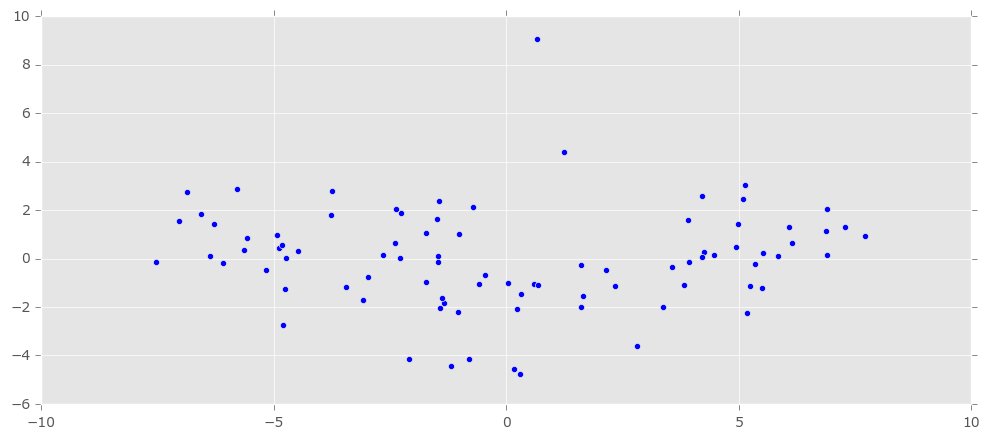

In [78]:
plt.scatter(PC[:,0], PC[:,1])

In [86]:
# Попробуем проинтерпретировать компоненты
df_components = pd.DataFrame(index=df.columns, data=pca.components_.T)

In [87]:
df_components.head()

,0,1,2,3
Annual insolation (W.h/m2.day),-0.182157,0.031387,0.210640,-0.057706
Energy (kcal/day),0.215426,-0.104883,0.029106,-0.166869
Protein (g/day),0.217126,-0.074852,-0.017143,-0.066304
Fats (g/day),0.223798,0.054772,0.007260,-0.035385
Carbohydrates (g/day),0.054325,-0.289593,0.060943,-0.293838


In [97]:
idx = np.argsort(np.abs(df_components.iloc[:,1].values))[::-1]

In [98]:
df_components.iloc[idx, :].head(20)

,0,1,2,3
Cereals - Excluding Beer (kcal/day),-0.096852,-0.330542,-0.030162,-0.180465
Carbohydrates (g/day),0.054325,-0.289593,0.060943,-0.293838
Bananas (kcal/day),0.001257,0.287689,0.218461,-0.018926
Vegetal Products + (kcal/day),0.086277,-0.279743,0.078895,-0.335577
Wheat (kcal/day),0.122579,-0.271693,-0.047607,0.020239
Pelagic Fish (kcal/day),0.030199,0.251863,0.052511,-0.276339
"Fish, Seafood (kcal/day)",0.062118,0.250779,0.039731,-0.267082
Coconut Oil (kcal/day),0.017009,0.228091,0.165299,-0.124404
Coffee (kcal/day),0.159855,0.225875,-0.020586,-0.035794
Vegetables (kcal/day),0.143784,-0.221800,-0.070304,-0.161904


#### Задание
Загрузите стандартный датасет с данными о лицах

Мы уже знаем, что для любой матрицы можно расчитать сингулярное разложение:
$$ A = U S V^\top .$$ (Кстати проверьте, что `A = u.dot(Sigma).dot(v)`)

Выполним "разложение" изображения по перым $k$ главным компонентам. Это значит, что надо расчитать матрицу
$$ A' = U S^{(k)} V^\top ,$$
где матрица $S^{(k)}$ получилась как матрица $S$, все значения, кроме $k$ первых строк заменили на 0.

Выберите лицо и разложите его на $k=10, 20, 50, 100$ компонент

In [100]:
# Нужен интернет
from sklearn.datasets import fetch_olivetti_faces 

In [101]:
data = fetch_olivetti_faces()

In [102]:
imgs = data.images

In [103]:
imgs.shape

(400, 64, 64)

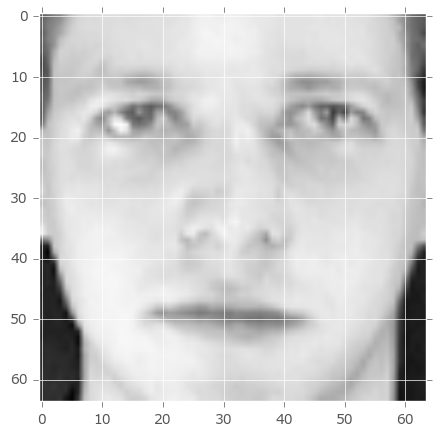

In [106]:
plt.imshow(imgs[0,:,:], cmap=plt.cm.Greys_r)

# T-SNE

#### Задание
Выполните многомерное шкалирование данных с цифрами с помощью tsne.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
## Your Code Here